In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from pyaugsynth import Dataprep, Synth

In [2]:
df = pd.read_csv('basque.csv')

dataprep = Dataprep(
    foo=df,
    predictors=('school.illit', 'school.prim', 'school.med',
        'school.high', 'school.post.high', 'invest'),
    predictors_op='mean',
    time_predictors_prior=range(1964, 1970),
    special_predictors=(
        ('gdpcap', range(1960, 1970) ,'mean'),
        ('sec.agriculture', range(1961, 1970, 2), 'mean'),
        ('sec.energy', range(1961, 1970, 2), 'mean'),
        ('sec.industry', range(1961, 1970, 2), 'mean'),
        ('sec.construction', range(1961, 1970, 2), 'mean'),
        ('sec.services.venta', range(1961, 1970, 2), 'mean'),
        ('sec.services.nonventa', range(1961, 1970, 2), 'mean'),
        ('popdens', [1969], 'mean')
    ),
    dependent = 'gdpcap',
    unit_variable = 'regionname',
    time_variable = 'year',
    treatment_identifier = 'Basque Country (Pais Vasco)',
    controls_identifier = ('Spain (Espana)', 'Andalucia', 'Aragon',
        'Principado De Asturias', 'Baleares (Islas)', 'Canarias',                   
        'Cantabria', 'Castilla Y Leon', 'Castilla-La Mancha',
        'Cataluna', 'Comunidad Valenciana', 'Extremadura',
        'Galicia', 'Madrid (Comunidad De)', 'Murcia (Region de)',
        'Navarra (Comunidad Foral De)', 'Rioja (La)'),
    time_optimize_ssr = range(1960, 1970)
)

synth = Synth()
synth.fit(dataprep=dataprep)

In [3]:
print("Non-zero weights:")
for region, weight in zip(dataprep.controls_identifier, synth.W):
    if weight > 1e-5:
        print("  ", region, round(weight, 3))

Non-zero weights:
   Cataluna 0.851
   Madrid (Comunidad De) 0.149


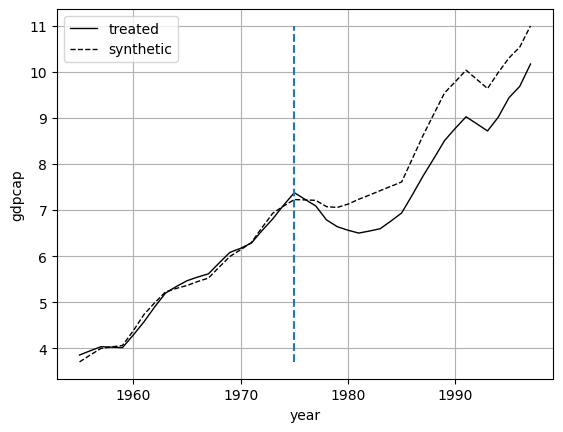

In [4]:
synth.path_plot(treatment_time=1975)

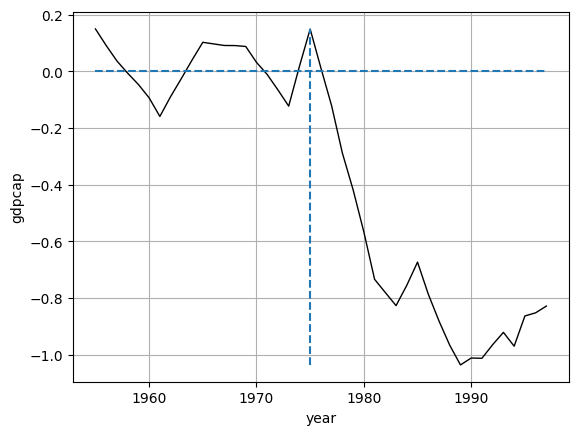

In [5]:
synth.gaps_plot(treatment_time=1975)